<a href="https://colab.research.google.com/github/MorganPeju/inf8225_project/blob/main/Projet_INF8225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet INF8225

### Equipe :
- Renaud Lespérance
- Gabriel Poupart
- Chu Ka Hei
- Morgan Péju

# Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree
from google.colab.patches import cv2_imshow
import os
import shutil
from google.colab import files
!pip install --upgrade --no-cache-dir gdown #NEED to uptade gdown to download dataset

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=4dd6e78bc6fd39ea4a3eaa96317f071f028abcf8dadfb7eaf9f44b39ef034c7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3y8x8r6x/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


# Dataset import

https://github.com/aiformankind/wildfire-smoke-dataset

Use up-to-date version of gdown to allow downloading a large file from google drive. The older version or the wget library does not work with files recognized as a virus when they are compressed and too large to be scanned by google.

In [2]:
### Dataset import and extraction
! gdown 1sEB77bfp2yMkgsSW9703vwDHol_cK6D5 -O smoke_dataset_V1.tar.gz
! gdown 1dpTDihAN47rSBRGn_XpEYCCcchXrxnZ0 -O smoke_dataset_V2.tar.gz
! mkdir -p datasets/smoke_dataset_V1
! mkdir -p datasets/smoke_dataset_V2
! tar xzf smoke_dataset_V1.tar.gz -C 'datasets/smoke_dataset_V1'
! tar xzf smoke_dataset_V2.tar.gz -C 'datasets/smoke_dataset_V2'
! mkdir -p datasets/smoke_dataset_V1/box_images
! mkdir -p datasets/smoke_dataset_V2/box_images

smoke_dataset_V1_path = "datasets/smoke_dataset_V1"
smoke_dataset_V1_images_folder = "/annotated_bounding_box_hpwren/images"
smoke_dataset_V1_annotations_folder = "/annotated_bounding_box_hpwren/xmls"
smoke_dataset_V2_path = "datasets/smoke_dataset_V2"
smoke_dataset_V2_images_folder = "/day_time_wildfire_v2/images"
smoke_dataset_V2_annotations_folder = "/day_time_wildfire_v2/annotations/xmls"

Downloading...
From: https://drive.google.com/uc?id=1sEB77bfp2yMkgsSW9703vwDHol_cK6D5
To: /content/smoke_dataset_V1.tar.gz
100% 28.6M/28.6M [00:00<00:00, 77.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dpTDihAN47rSBRGn_XpEYCCcchXrxnZ0
To: /content/smoke_dataset_V2.tar.gz
100% 501M/501M [00:05<00:00, 85.6MB/s]


In [3]:
def add_box_to_image(datasets_path,images_folder,xml_folder,file_name,print_info,save_img):

  ### Read XML
  tree = etree.parse(f"{datasets_path}{xml_folder}/{file_name}.xml")
  root = tree.getroot()
  size = root[4]
  box = root[6][4]
  label = root[6][0].text
  width,height,depth = int(size[0].text),int(size[1].text),int(size[2].text)
  xmin,ymin,xmax, ymax = int(float(box[0].text)),int(float(box[1].text)),int(float(box[2].text)),int(float(box[3].text))

  ### Read Image
  img = cv2.imread(f"{datasets_path}{images_folder}/{file_name}.jpeg") 
  color = (0,255,0) #green
  cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,1)
  font = cv2.FONT_HERSHEY_PLAIN
  cv2.putText(img,label,(xmin,ymin-2),font,1,(0,0,255),1)

  if print_info:
    print(f"width : {width} ; height : {height} ; depth : {depth}")
    print(f"xmin : {xmin} ; ymin : {ymin} ; xmax : {xmax} ; ymin : {ymin}")
    cv2_imshow(img)
  
  if save_img:
    cv2.imwrite(f"{datasets_path}/box_images/{file_name}.jpeg",img) 

def find_file_names (datasets_path,images_folder) : 
  ### image file names, the coresponding XML have the same name
  image_files_names = []
  files = os.walk(f"{datasets_path}{images_folder}")
  for file in files :
    files = file[2]
  for file in files :
    if file[0] != "." :
      image_files_names.append(file[:-5])
  return image_files_names

width : 640 ; height : 480 ; depth : 3
xmin : 448 ; ymin : 196 ; xmax : 539 ; ymin : 196


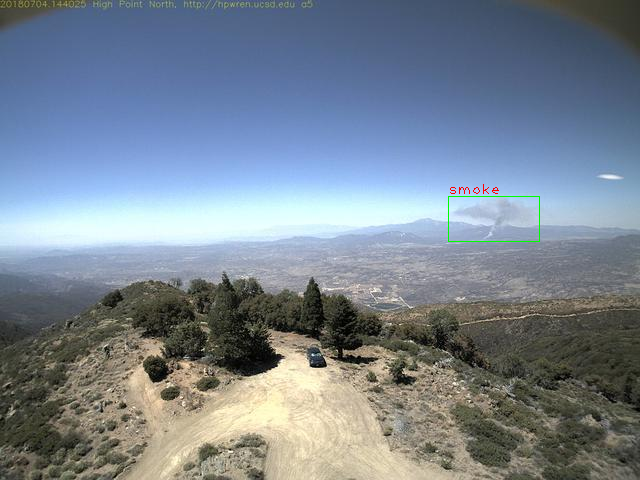

width : 640 ; height : 480 ; depth : 3
xmin : 589 ; ymin : 162 ; xmax : 639 ; ymin : 162


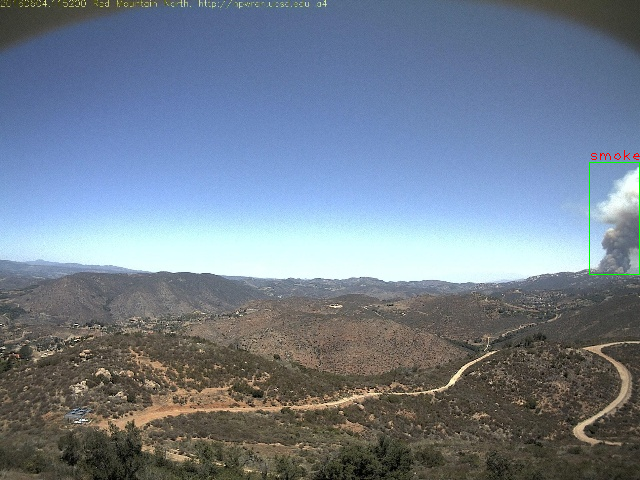

In [4]:
### One test image
file_name = "ck0k99e6p79go0944lmxivkmv"
add_box_to_image(smoke_dataset_V1_path,smoke_dataset_V1_images_folder,smoke_dataset_V1_annotations_folder,file_name,True,True)
file_name = "ckagz65fcanl60b12682yukgz"
add_box_to_image(smoke_dataset_V2_path,smoke_dataset_V2_images_folder,smoke_dataset_V2_annotations_folder,file_name,True,True)

In [5]:
### Add bonding box to all images dataset V1 - 11sec
image_files_names = find_file_names(smoke_dataset_V1_path,smoke_dataset_V1_images_folder)
for file_name in image_files_names :
  add_box_to_image(smoke_dataset_V1_path,smoke_dataset_V1_images_folder,smoke_dataset_V1_annotations_folder,file_name,False,True)
shutil.make_archive(f"{smoke_dataset_V1_path}/box_images_V1", 'zip', f"{smoke_dataset_V1_path}/box_images")
# files.download('{smoke_dataset_V1_path}/box_images_V1.zip') # auto download zip

'/content/datasets/smoke_dataset_V1/box_images_V1.zip'

In [6]:
### Add bonding box to all images dataset V2 - 40 sec
image_files_names = find_file_names(smoke_dataset_V2_path,smoke_dataset_V2_images_folder)
for file_name in image_files_names :
  add_box_to_image(smoke_dataset_V2_path,smoke_dataset_V2_images_folder,smoke_dataset_V2_annotations_folder,file_name,False,True)
shutil.make_archive(f"{smoke_dataset_V2_path}/box_images_V2", 'zip', f"{smoke_dataset_V2_path}/box_images")
# files.download('{smoke_dataset_V2_path}/box_images_V2.zip') # auto download zip

'/content/datasets/smoke_dataset_V2/box_images_V2.zip'

# test with darkflow
https://github.com/thtrieu/darkflow

In [10]:
!pip install git+https://github.com/thtrieu/darkflow.git

  Cloning https://github.com/thtrieu/darkflow.git to /tmp/pip-req-build-bs10688s
  Running command git clone -q https://github.com/thtrieu/darkflow.git /tmp/pip-req-build-bs10688s
  Created wheel for darkflow: filename=darkflow-1.0.0-cp37-cp37m-linux_x86_64.whl size=813210 sha256=f846d7c2518f4040aa9a321ffb736bbc8a26f1bb6963a74e37bcd44c936836d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-b8uwwm9h/wheels/41/d4/dd/8c1584527589c370806bb1e7069dce12980a3f5b96e8f05d9e
Successfully built darkflow


In [12]:
!gdown https://github.com/MorganPeju/inf8225_project/blob/52570d30c361a4040f081f7021239653142c4a5f/labels.txt
!gdown https://github.com/MorganPeju/inf8225_project/blob/22d6fefc7530b47f859008f2b58ac6d1f7a8c8aa/tiny-yolo-1c.cfg
!gdown https://github.com/MorganPeju/inf8225_project/blob/22d6fefc7530b47f859008f2b58ac6d1f7a8c8aa/yolo-1c.cfg

Downloading...
From: https://github.com/MorganPeju/inf8225_project/blob/52570d30c361a4040f081f7021239653142c4a5f/labels.txt
To: /content/labels.txt
140kB [00:00, 68.3MB/s]
Downloading...
From: https://github.com/MorganPeju/inf8225_project/blob/22d6fefc7530b47f859008f2b58ac6d1f7a8c8aa/tiny-yolo-1c.cfg
To: /content/tiny-yolo-1c.cfg
170kB [00:00, 113MB/s]
Downloading...
From: https://github.com/MorganPeju/inf8225_project/blob/22d6fefc7530b47f859008f2b58ac6d1f7a8c8aa/yolo-1c.cfg
To: /content/yolo-1c.cfg
202kB [00:00, 80.1MB/s]


In [17]:
from darkflow.net.build import TFNet
import cv2

options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": 0.1}
tfnet = TFNet(options)

ModuleNotFoundError: ignored

In [ ]:
imgcv = cv2.imread("datasets/smoke_dataset_V1/annotated_bounding_box_hpwren/images/ck0k99e6p79go0944lmxivkmv.jpeg")
result = tfnet.return_predict(imgcv)
print(result)

# test with darknet

In [19]:
# Voir : 
# YOLOv1 : https://pjreddie.com/darknet/yolov1/
# YOLOv2 : https://pjreddie.com/darknet/yolov2/
# YOLOv3 : https://pjreddie.com/darknet/yolo/

# YOLOv3 exemple with pre train model
The code for this section was taken from :

https://medium.com/analytics-vidhya/object-detection-with-opencv-python-using-yolov3-481f02c6aa35

In [ ]:
#https://medium.com/analytics-vidhya/object-detection-with-opencv-python-using-yolov3-481f02c6aa35
#weights = https://pjreddie.com/media/files/yolov3.weights
!wget -N https://pjreddie.com/media/files/yolov3.weights
# for github file take the URL of the raw preview and not the HTML
!wget -N https://raw.githubusercontent.com/pjreddie/darknet/b1ab3da442574364f82c09313a58f7fc93cea2bd/data/coco.names
!wget -N https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

#Load YOLOv3
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
  classes = [line.strip() for line in f.readlines()]
print(classes)

# Create network
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0]-1]for i in net.getUnconnectedOutLayers()]

--2022-03-27 16:16:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘yolov3.weights’ not modified on server. Omitting download.

--2022-03-27 16:16:16--  https://raw.githubusercontent.com/pjreddie/darknet/b1ab3da442574364f82c09313a58f7fc93cea2bd/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-03-27 16:16:16 (24.1 MB/s) - ‘coco.names’ saved [625/625]

--2022-03-27 16:16

for details.

--2022-03-27 16:16:30--  https://th.bing.com/th/id/R.c78b17290d1abf81e2d01962692b5738?rik=wIQXWI4MiTHxwg
Resolving th.bing.com (th.bing.com)... 204.79.197.200, 13.107.21.200, 2620:1ec:c11::200
Connecting to th.bing.com (th.bing.com)|204.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413518 (404K) [image/png]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>] 403.83K  --.-KB/s    in 0.06s   

2022-03-27 16:16:30 (6.34 MB/s) - ‘image1.jpg’ saved [413518/413518]



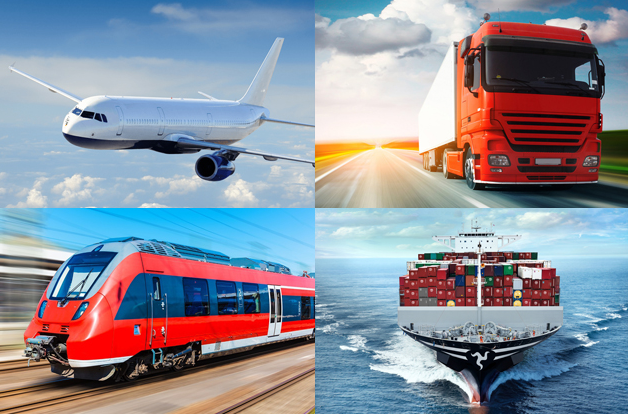

In [ ]:
# Get a image
!wget -N -O image1.jpg https://th.bing.com/th/id/R.c78b17290d1abf81e2d01962692b5738?rik=wIQXWI4MiTHxwg&pid=ImgRaw&r=0&sres=1&sresct=1
img = "image1.jpg"
img = cv2.imread(img) # reads image
# img = cv2.resize(img,None,fx=0.5,fy=0.5)
height,weidth,channels = img.shape
cv2_imshow(img)

#feature extraction
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=True)

#propagation
net.setInput(blob)
outs = net.forward(outputlayers)

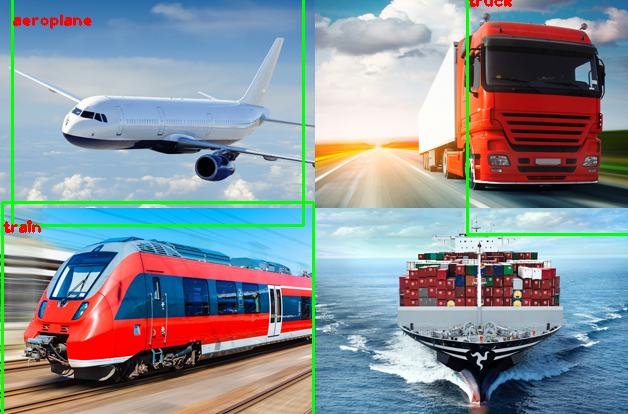

In [ ]:
### print output
class_ids = []
confidences=[]
min_confidences = 0.5
boxes =[]
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > min_confidences :
      center_x = int(detection[0]*weidth)
      center_y = int(detection[1]*height)
      w = int(detection[2]*weidth)
      h = int(detection[3]*weidth)

      # cv2.circle(img,(center_x,center_y),10,(0,255,0),2)

      x=int(center_x - w/2)
      y=int(center_y -h/2)
      boxes.append((x,y,w,h))
      confidences.append(float(confidence))
      class_ids.append(class_id)
font = cv2.FONT_HERSHEY_PLAIN
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
for i,boxe in enumerate(boxes):
  if i in indexes:
    x,y,w,h = boxe
    label = str(classes[class_ids[i]])
    # color = colors[i]
    color = (0,255,0) #green
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,label,(x,y+30),font,1,(0,0,255),2)
cv2_imshow(img)